In [18]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import statsmodels.api as sm
from scipy import stats

In [19]:
# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [20]:
path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")


Korrelation Alter ↔ Betrag:
 Pearson : -0.0097
 Spearman: -0.0235
 Kendall : -0.0156


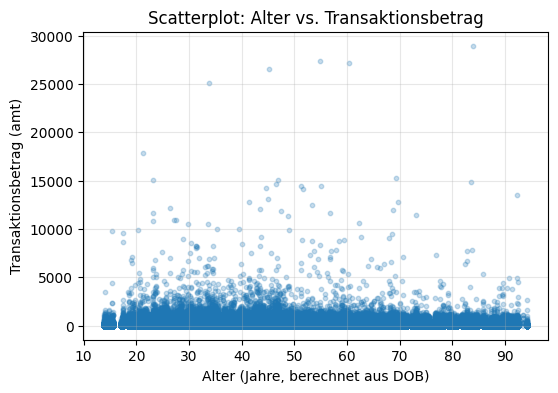

In [22]:
# Alter berechnen
ds["dob"] = pd.to_datetime(ds["dob"], errors="coerce")
age = (pd.Timestamp("2019-01-01") - ds["dob"]).dt.days / 365.25

# Korrelationen berechnen
pearson_corr  = age.corr(ds["amt"], method="pearson")
spearman_corr = age.corr(ds["amt"], method="spearman")
kendall_corr  = age.corr(ds["amt"], method="kendall")

print("Korrelation Alter ↔ Betrag:")
print(f" Pearson : {pearson_corr: .4f}")
print(f" Spearman: {spearman_corr: .4f}")
print(f" Kendall : {kendall_corr: .4f}")

# Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(age, ds["amt"], alpha=0.25, s=10)
plt.title("Scatterplot: Alter vs. Transaktionsbetrag")
plt.xlabel("Alter (Jahre, berechnet aus DOB)")
plt.ylabel("Transaktionsbetrag (amt)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)
 Pearson :  0.0058
 Spearman: -0.0236
 Kendall : -0.0157


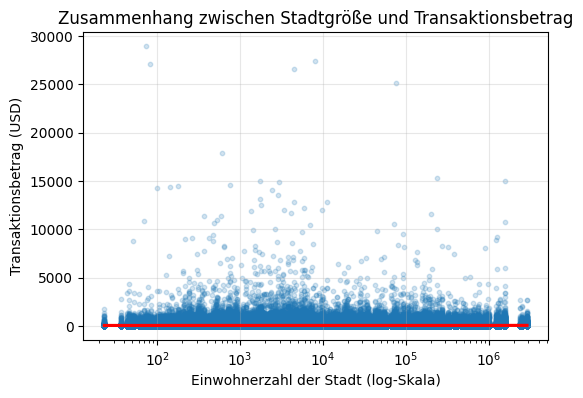

In [23]:
# --- Korrelationen berechnen ---
pearson  = ds["city_pop"].corr(ds["amt"], method="pearson")
spearman = ds["city_pop"].corr(ds["amt"], method="spearman")
kendall  = ds["city_pop"].corr(ds["amt"], method="kendall")

print("Korrelation Stadtgröße (city_pop) ↔ Betrag (amt)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# --- Scatterplot mit Regressionslinie ---
plt.figure(figsize=(6,4))
sns.regplot(
    x="city_pop", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10}, 
    line_kws={"color":"red"}
)
plt.xscale("log")   # log-Skala, da city_pop stark variiert (kleine & große Städte)
plt.title("Zusammenhang zwischen Stadtgröße und Transaktionsbetrag")
plt.xlabel("Einwohnerzahl der Stadt (log-Skala)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()

Korrelation Betrag (amt) ↔ Zeit (unix_time)
 Pearson : -0.0003
 Spearman:  0.0006
 Kendall :  0.0004


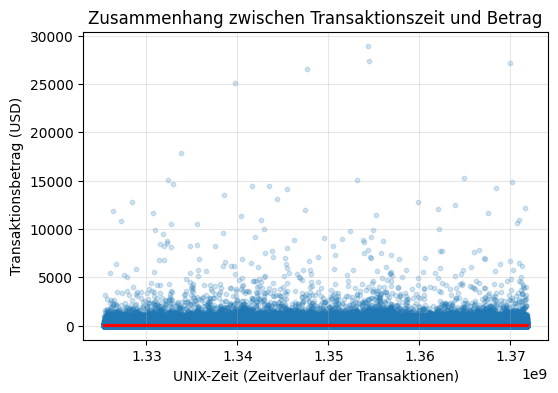

In [24]:
# --- Korrelationen berechnen ---
pearson  = ds["amt"].corr(ds["unix_time"], method="pearson")
spearman = ds["amt"].corr(ds["unix_time"], method="spearman")
kendall  = ds["amt"].corr(ds["unix_time"], method="kendall")

print("Korrelation Betrag (amt) ↔ Zeit (unix_time)")
print(f" Pearson : {pearson: .4f}")
print(f" Spearman: {spearman: .4f}")
print(f" Kendall : {kendall: .4f}")

# --- Scatterplot mit Regressionslinie ---
plt.figure(figsize=(6,4))
sns.regplot(
    x="unix_time", 
    y="amt", 
    data=ds, 
    scatter_kws={"alpha":0.2, "s":10},
    line_kws={"color":"red"}
)
plt.title("Zusammenhang zwischen Transaktionszeit und Betrag")
plt.xlabel("UNIX-Zeit (Zeitverlauf der Transaktionen)")
plt.ylabel("Transaktionsbetrag (USD)")
plt.grid(True, alpha=0.3)
plt.show()